# Loading all the libraries.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Loading data from the csv.
- [Salary Dataset - 2022](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022/code)

In [3]:
data=pd.read_csv("Salary_Dataset_with_Extra_Features.csv")

# Exploring Data to understand it's variables and their importence and trends.

In [4]:
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
data.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [6]:
data.nunique()

Rating                  41
Company Name         11261
Job Title             1080
Salary                 316
Salaries Reported       82
Location                10
Employment Status        4
Job Roles               11
dtype: int64

# Checking the correlation between different variables

In [7]:
data.corr()

,Rating,Salary,Salaries Reported
Rating,1.000000,0.025476,-0.011690
Salary,0.025476,1.000000,0.004481
Salaries Reported,-0.011690,0.004481,1.000000


# Checking relation of Salary with City.

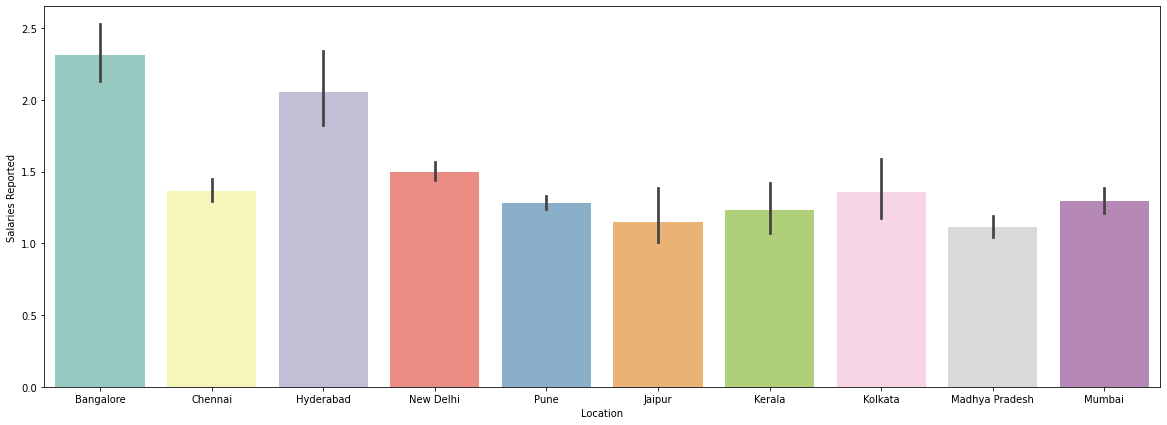

In [8]:
plot.figure(figsize = (20, 7))
sns.barplot(x = data["Location"], y = data["Salaries Reported"], palette = "Set3");

# Encording data
As a neural network work on numerical data only so we use LabelEncoder from sklearn library to convert these classes into numerical values.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le0=LabelEncoder()
data["Company Name"]=le0.fit_transform(data["Company Name"])
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,8130,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,417,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,9778,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,8534,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,884,Android Developer,600000,3,Bangalore,Full Time,Android


# Dictionary containing the key,value pairs for each LabelEncoder

In [11]:
keys = le0.classes_
values = le0.transform(le0.classes_)
compniesDict = dict(zip(keys, values))
print(compniesDict)

{'(X,Y,Z) Architecture & Design': 0, '(no)name': 1, '-': 2, '....': 3, '.Kreate': 4, '1 Crore Projects': 5, '10': 6, '100Plus (India)': 7, '10Decoders Consultancy Services': 8, '11Signals Technologies': 9, '17544': 10, '1985': 11, '1Digitals': 12, '1Gen': 13, '1K Kirana Bazaar': 14, '1Tab': 15, '1mg': 16, '1st Risk Solutions': 17, '2018': 18, '20K Group': 19, '21North Europ Assistance': 20, '21st Century Software Solutions': 21, '22feet': 22, '24 Seven Talent': 23, '24x7 Internet Technologies': 24, '25K DIGITAL': 25, '2COMS': 26, '2nd Year': 27, '3 Marketing Pillars': 28, '300 Plus Consultant': 29, '3000 Corp.': 30, '314e': 31, '360 Degree Info-Dynamics': 32, '360 Nautica': 33, '360degreeinfo': 34, '3ACES Technologies': 35, '3AG Network Solutions': 36, '3D Systems': 37, '3Edge': 38, '3Embed Software Technologies': 39, '3K Technologies': 40, '3PS Media India': 41, '3Pillar Global': 42, '3RI Technologies': 43, '3dplm Software Solution': 44, '3frames': 45, '3i Infotech': 46, '4 Way Techno

In [12]:
le1=LabelEncoder()
data["Job Title"]=le1.fit_transform(data["Job Title"])
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,8130,28,400000,3,Bangalore,Full Time,Android
1,4.5,417,28,400000,3,Bangalore,Full Time,Android
2,4.0,9778,28,1000000,3,Bangalore,Full Time,Android
3,3.8,8534,28,300000,3,Bangalore,Full Time,Android
4,4.4,884,28,600000,3,Bangalore,Full Time,Android


In [13]:
keys = le1.classes_
values = le1.transform(le1.classes_)
jobTitleDict = dict(zip(keys, values))
print(jobTitleDict)

{'"ORACLE DBA"': 0, '.NET Developer, Python': 1, '.NET/Android Developer': 2, 'AEM Front End Developer - Intern': 3, 'ASAP Software Development Engineer': 4, 'AVP-Java Developer': 5, 'Ace - Android Development': 6, 'Advanced Database Administrator': 7, 'Advanced Python Developer': 8, 'Amazon Software Development Engineer': 9, 'Amazon Software Development Engineer - Intern': 10, 'Amazon Software Development Engineer I': 11, 'Amazon Software Development Engineer II': 12, 'Amazon Software Development Engineer In Test': 13, 'Android': 14, 'Android & Flutter Developer - Intern': 15, 'Android &amp; Flutter Developer': 16, 'Android - Intern': 17, 'Android App Developer': 18, 'Android App Developer - Intern': 19, 'Android App Development': 20, 'Android Applications Developer': 21, 'Android Applications Developer - Contractor': 22, 'Android Applications Developer - Intern': 23, 'Android Applications Develpoers': 24, 'Android Architect': 25, 'Android Associate Trainee': 26, 'Android Develoiper':

In [14]:
le2=LabelEncoder()
data["Employment Status"]=le2.fit_transform(data["Employment Status"])
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,8130,28,400000,3,Bangalore,1,Android
1,4.5,417,28,400000,3,Bangalore,1,Android
2,4.0,9778,28,1000000,3,Bangalore,1,Android
3,3.8,8534,28,300000,3,Bangalore,1,Android
4,4.4,884,28,600000,3,Bangalore,1,Android


In [15]:
keys = le2.classes_
values = le2.transform(le2.classes_)
empStatusDict = dict(zip(keys, values))
print(empStatusDict)

{'Contractor': 0, 'Full Time': 1, 'Intern': 2, 'Trainee': 3}


In [16]:
le3=LabelEncoder()
data["Location"]=le3.fit_transform(data["Location"])
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,8130,28,400000,3,0,1,Android
1,4.5,417,28,400000,3,0,1,Android
2,4.0,9778,28,1000000,3,0,1,Android
3,3.8,8534,28,300000,3,0,1,Android
4,4.4,884,28,600000,3,0,1,Android


In [17]:
keys = le3.classes_
values = le3.transform(le3.classes_)
locationDict = dict(zip(keys, values))
print(locationDict)

{'Bangalore': 0, 'Chennai': 1, 'Hyderabad': 2, 'Jaipur': 3, 'Kerala': 4, 'Kolkata': 5, 'Madhya Pradesh': 6, 'Mumbai': 7, 'New Delhi': 8, 'Pune': 9}


In [18]:
le4=LabelEncoder()
data["Job Roles"]=le4.fit_transform(data["Job Roles"])
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,8130,28,400000,3,0,1,0
1,4.5,417,28,400000,3,0,1,0
2,4.0,9778,28,1000000,3,0,1,0
3,3.8,8534,28,300000,3,0,1,0
4,4.4,884,28,600000,3,0,1,0


In [19]:
keys = le4.classes_
values = le4.transform(le4.classes_)
rolesDict = dict(zip(keys, values))
print(rolesDict)

{'Android': 0, 'Backend': 1, 'Database': 2, 'Frontend': 3, 'IOS': 4, 'Java': 5, 'Mobile': 6, 'Python': 7, 'SDE': 8, 'Testing': 9, 'Web': 10}


In [20]:
data.corr()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
Rating,1.000000,-0.008015,0.004264,0.025476,-0.011690,0.002801,0.036271,0.002072
Company Name,-0.008015,1.000000,-0.004880,-0.008565,-0.029557,-0.013049,-0.010049,-0.001216
Job Title,0.004264,-0.004880,1.000000,0.078433,0.084935,-0.107749,0.007075,0.843717
Salary,0.025476,-0.008565,0.078433,1.000000,0.004481,-0.005945,-0.101473,0.032260
Salaries Reported,-0.011690,-0.029557,0.084935,0.004481,1.000000,-0.049163,-0.009826,0.091225
Location,0.002801,-0.013049,-0.107749,-0.005945,-0.049163,1.000000,0.056476,-0.089645
Employment Status,0.036271,-0.010049,0.007075,-0.101473,-0.009826,0.056476,1.000000,0.023712
Job Roles,0.002072,-0.001216,0.843717,0.032260,0.091225,-0.089645,0.023712,1.000000


# Checking the correlation of data points after normalization and label encoding.

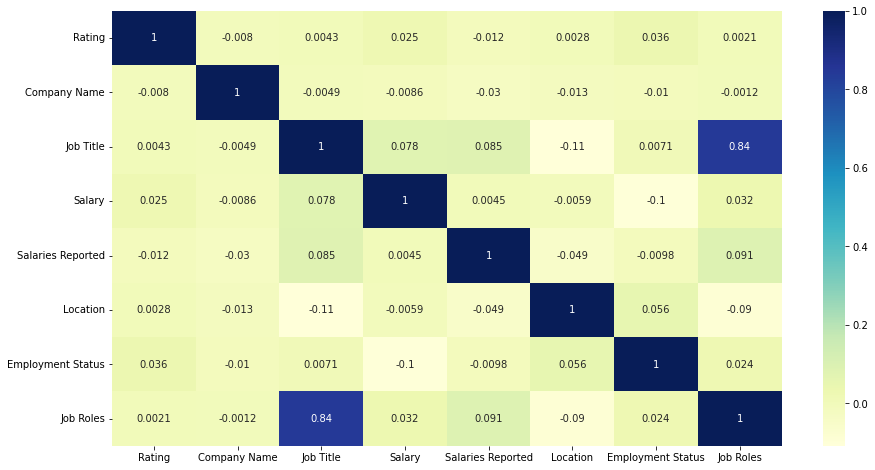

In [21]:
plot.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plot.show()

# Removing variable with lead correlation.

In [26]:
data=data.drop("Company Name" ,axis=1)
data=data.drop("Salaries Reported",axis=1)

# Checking the correlation of data points after normalization and label encoding.

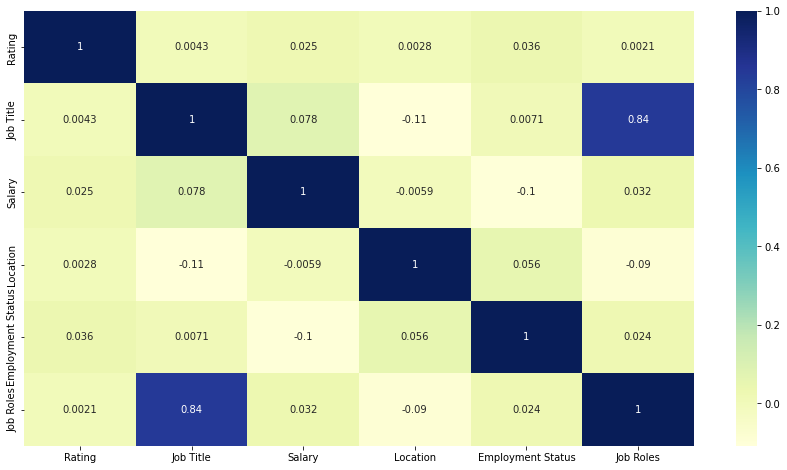

In [28]:
plot.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plot.show()

In [54]:
Y=data["Job Roles"]
Y=Y.to_numpy()

In [57]:
X=data.drop("Job Roles",axis=1)
X=X.to_numpy()

In [58]:
X.size/5

22770.0

In [60]:
x_train, y_train,x_test, y_test = train_test_split(X,Y,test_size=0.25)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(22770,5)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(11, activation='relu')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 17077
  y sizes: 5693
Make sure all arrays contain the same number of samples.

In [48]:
x_train

,Rating,Job Title,Salary,Location,Employment Status
13627,3.9,829,800000,0,1
7904,4.4,286,2400000,8,1
16038,3.8,831,350000,5,1
2842,3.0,28,700000,9,1
11603,3.9,584,800000,2,1
...,...,...,...,...,...
7075,4.1,237,228000,9,1
2064,4.0,28,792000,8,1
2827,4.6,28,200000,9,1
20772,4.6,770,1800000,2,1
